# Weather Forecasting

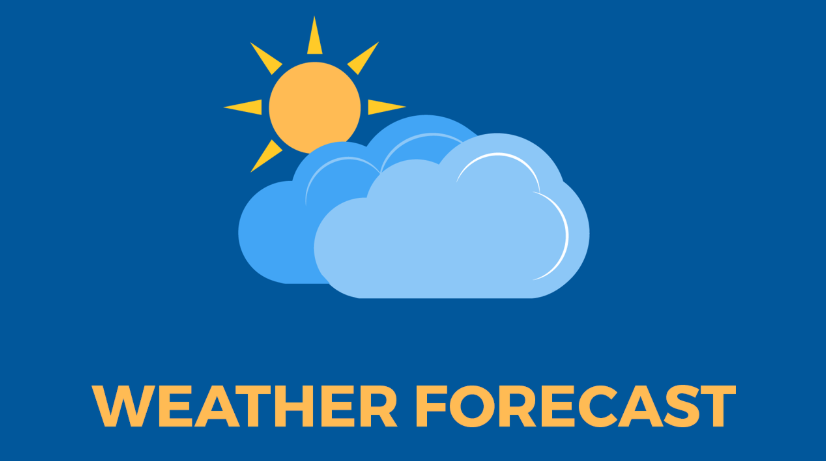

## Import Library

In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Datasets

In [232]:
link_data_training = '../input/ssds-ssf/Train/Admiralty/Data_Gabungan_Lainnya_2013.csv'
contoh = pd.read_csv(link_data_training)
contoh.head()

,Date,Highest 30 Min Rainfall (mm),Highest 60 Min Rainfall (mm),Highest 120 Min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h)
0,2013-01-01,,,,27.0,32.0,23.6,7.2,28.8
1,2013-01-02,,,,26.3,30.8,23.2,7.2,35.3
2,2013-01-03,,,,26.6,31.4,24.8,8.3,27.7
3,2013-01-04,,,,27.0,30.9,24.5,10.0,28.1
4,2013-01-05,,,,27.1,30.2,25.0,9.4,29.9


In [233]:
import os
import glob
import re

# Path
base_train_path = '../input/ssds-ssf/Train/'
output_path = '/kaggle/working/ssds-ssf/Data_Gabungan_Dibersihkan/'

# Cleaning Column Name
def clean_column_names(df):
    """
    Membersihkan dan menyeragamkan nama kolom pada DataFrame.
    """
    new_columns = []
    for col in df.columns:
        cleaned_col = col.strip().replace(' ', '_').lower()
        cleaned_col = re.sub(r'[().%°]', '', cleaned_col)
        new_columns.append(cleaned_col)
    df.columns = new_columns
    return df

# Merge Dataset Each City
def proses_semua_lokasi(path_induk, path_keluaran):
    """
    Melakukan loop ke semua folder, menggabungkan CSV, membersihkan nama kolom,
    dan menyimpan hasilnya.
    """
    print("Memulai proses otomatis untuk semua lokasi...")
    os.makedirs(path_keluaran, exist_ok=True)
    print(f"Folder output dipastikan ada di: {path_keluaran}")

    try:
        folder_lokasi = [f.name for f in os.scandir(path_induk) if f.is_dir()]
        print(f"Ditemukan {len(folder_lokasi)} folder lokasi untuk diproses.")
    except FileNotFoundError:
        print(f"❌ Error: Direktori induk tidak ditemukan di '{path_induk}'. Hentikan proses.")
        return

    for nama_lokasi in folder_lokasi:
        print(f"\n-> Memproses: '{nama_lokasi}'...")

        path_lokasi_spesifik = os.path.join(path_induk, nama_lokasi)
        daftar_file_csv = sorted(glob.glob(os.path.join(path_lokasi_spesifik, "*.csv")))

        if not daftar_file_csv:
            print(f"  -- Lewati '{nama_lokasi}', tidak ada file .csv ditemukan.")
            continue

        # PENTING: Lakukan pembersihan nama kolom SEBELUM digabung
        list_of_dfs = []
        for file in daftar_file_csv:
            df = pd.read_csv(file)
            # Langsung bersihkan nama kolom setelah file dibaca
            df = clean_column_names(df)
            list_of_dfs.append(df)

        # Gabungkan DataFrame yang nama kolomnya sudah seragam
        df_gabungan = pd.concat(list_of_dfs, ignore_index=True)

        # Cek jumlah kolom setelah digabung
        print(f"  -> Jumlah kolom setelah digabung: {len(df_gabungan.columns)}")

        nama_file_output = f"{nama_lokasi}_gabungan_bersih.csv"
        path_file_output = os.path.join(path_keluaran, nama_file_output)

        df_gabungan.to_csv(path_file_output, index=False)
        print(f"  ✅ Berhasil! Data dengan kolom bersih disimpan di: '{nama_file_output}'")

    print("\n\n🎉 Semua proses selesai!")

# Running
proses_semua_lokasi(base_train_path, output_path)

Memulai proses otomatis untuk semua lokasi...
Folder output dipastikan ada di: /kaggle/working/ssds-ssf/Data_Gabungan_Dibersihkan/
Ditemukan 44 folder lokasi untuk diproses.

-> Memproses: 'Queenstown'...
  -> Jumlah kolom setelah digabung: 9
  ✅ Berhasil! Data dengan kolom bersih disimpan di: 'Queenstown_gabungan_bersih.csv'

-> Memproses: 'Ulu_Pandan'...
  -> Jumlah kolom setelah digabung: 9
  ✅ Berhasil! Data dengan kolom bersih disimpan di: 'Ulu_Pandan_gabungan_bersih.csv'

-> Memproses: 'Jurong_Island'...
  -> Jumlah kolom setelah digabung: 9
  ✅ Berhasil! Data dengan kolom bersih disimpan di: 'Jurong_Island_gabungan_bersih.csv'

-> Memproses: 'Seletar'...
  -> Jumlah kolom setelah digabung: 9
  ✅ Berhasil! Data dengan kolom bersih disimpan di: 'Seletar_gabungan_bersih.csv'

-> Memproses: 'Jurong_Pier'...
  -> Jumlah kolom setelah digabung: 9
  ✅ Berhasil! Data dengan kolom bersih disimpan di: 'Jurong_Pier_gabungan_bersih.csv'

-> Memproses: 'Tuas_South'...
  -> Jumlah kolom setel

In [234]:
admiralty_merged_path = '/kaggle/working/ssds-ssf/Data_Gabungan_Dibersihkan/Admiralty_gabungan_bersih.csv'
admiralty_merged = pd.read_csv(admiralty_merged_path)
admiralty_merged.head()

,date,highest_30_min_rainfall_mm,highest_60_min_rainfall_mm,highest_120_min_rainfall_mm,mean_temperature_c,maximum_temperature_c,minimum_temperature_c,mean_wind_speed_km/h,max_wind_speed_km/h
0,2009-01-01,,,,,,,,
1,2009-01-02,,,,,,,,
2,2009-01-03,,,,,,,,
3,2009-01-04,,,,,,,,
4,2009-01-05,,,,,,,,


In [235]:
admiralty_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5448 entries, 0 to 5447
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   date                         5448 non-null   object
 1   highest_30_min_rainfall_mm   5153 non-null   object
 2   highest_60_min_rainfall_mm   5153 non-null   object
 3   highest_120_min_rainfall_mm  5153 non-null   object
 4   mean_temperature_c           5424 non-null   object
 5   maximum_temperature_c        5424 non-null   object
 6   minimum_temperature_c        5424 non-null   object
 7   mean_wind_speed_km/h         5394 non-null   object
 8   max_wind_speed_km/h          5395 non-null   object
dtypes: object(9)
memory usage: 383.2+ KB


In [236]:
# !pip install pandas opencv-python pytesseract

In [237]:
import os
import glob
import cv2
import pytesseract
import re
import math
import warnings

warnings.filterwarnings('ignore')

# Path
base_train_path = '../input/ssds-ssf/Train/'
output_path = '/kaggle/working/ssds-ssf/Data_Ekstraksi_Plot/'

# Cleaning Column
def clean_column_names(df):
    """
    Membersihkan dan menyeragamkan nama kolom pada DataFrame.
    """
    new_columns = []
    for col in df.columns:
        cleaned_col = col.strip().replace(' ', '_').lower()
        cleaned_col = re.sub(r'[().%°/]', '', cleaned_col)
        new_columns.append(cleaned_col)
    df.columns = new_columns
    return df

# Plot Extraction
def find_top_border(gray_image, plot_x_start, plot_x_end):
    """
    Menemukan posisi piksel Y dari garis batas atas plot
    dengan metode horizontal projection.
    """
    plot_area = gray_image[:, plot_x_start:plot_x_end]
    _, binary_inv = cv2.threshold(plot_area, 200, 255, cv2.THRESH_BINARY_INV)

    horizontal_projection = np.sum(binary_inv, axis=1)
    for y, pixel_sum in enumerate(horizontal_projection[10:], start=10):
        if pixel_sum > (plot_area.shape[1] * 0.20 * 255): 
            return y
            
    return None

def label_extraction(image_path):
    """
    Mengekstrak label Y, memprediksi nilai 0, dan juga memprediksi
    nilai maksimum absolut dari plot berdasarkan garis batas atas.
    """
    try:
        image = cv2.imread(image_path)
        if image is None:
            print(f"Error: Gambar tidak ditemukan di {image_path}")
            return None, None

        output_image = image.copy()
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # --- Bagian Ekstraksi Label OCR (Tetap Sama) ---
        y_start, y_end = 0, 617
        x_start, x_end = 0, 1500
        y_axis_roi = gray[y_start:y_end, x_start:x_end]
        y_axis_roi_clean = cv2.threshold(y_axis_roi, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
        config = r'--oem 3 --psm 6 outputbase digits'
        data = pytesseract.image_to_data(y_axis_roi_clean, config=config, output_type=pytesseract.Output.DICT)

        label_lokasi = []

        n_boxes = len(data['level'])
        for i in range(n_boxes):
            text = data['text'][i].strip()
            if text.isdigit() and int(text) < 200:
                (x, y, w, h) = (data['left'][i], data['top'][i], data['width'][i], data['height'][i])
                real_x = x + x_start + w/2
                real_y = y + y_start + h/2
                if int(text)%5 == 0:
                    label_lokasi.append({
                        'text': int(text), 'x': real_x, 'y': real_y, 'width': w, 'height': h
                    })
                else:
                    continue

        if len(label_lokasi) < 2:
            for i in range(n_boxes):
                text = data['text'][i].strip()
                if text.isdigit() and int(text) < 200:
                    (x, y, w, h) = (data['left'][i], data['top'][i], data['width'][i], data['height'][i])
                    real_x = x + x_start + w/2
                    real_y = y + y_start + h/2
                    label_lokasi.append({
                        'text': int(text), 'x': real_x, 'y': real_y, 'width': w, 'height': h
                    })

        sorted_lokasi = sorted(label_lokasi, key=lambda item: item['text'])
        
        p_max_1 = sorted_lokasi[-1]  
        p_max_2 = sorted_lokasi[-2]  
        
        pixel_diff = abs(p_max_2['y'] - p_max_1['y'])
        value_diff = abs(p_max_2['text'] - p_max_1['text'])

        avg_pixel_per_value = pixel_diff / value_diff
        
        # Prediksi label 0
        ref_label_min = sorted_lokasi[-1]
        pixel_step_to_zero = ref_label_min['text'] * avg_pixel_per_value
        predicted_y_zero = ref_label_min['y'] + pixel_step_to_zero
        label_lokasi.append({
            'text': 0, 'x': ref_label_min['x'], 'y': predicted_y_zero, 'width': ref_label_min['width'], 'height': ref_label_min['height']
        })

        # Prediksi Nilai Maksimum Berdasarkan Border
        data_boundaries = find_data_boundaries(image_path)
        plot_x_start, plot_x_end_border = data_boundaries['data_start'], data_boundaries['data_end']
        top_border_y = find_top_border(gray, plot_x_start, plot_x_end_border)

        if top_border_y:
            ref_label_max = sorted_lokasi[-1]
            pixel_dist_to_border = ref_label_max['y'] - top_border_y
            value_increase = pixel_dist_to_border / avg_pixel_per_value
            predicted_max_val = ref_label_max['text'] + value_increase
            label_lokasi.append({
                'text': predicted_max_val, 'x': ref_label_max['x'], 'y': top_border_y, 'width': ref_label_max['width'], 'height': ref_label_max['height']
            })
            
        final_dict = {item['text']: (item['x'], item['y']) for item in sorted(label_lokasi, key=lambda item: item['text'])}
        return final_dict

    except Exception as e:
        print(f"Terjadi error: {e}")
        return None

def find_data_boundaries(image_path: str) -> dict:
    """
    Mencari titik mulai dan selesainya data dalam satu plot
    """
    try:
        image = cv2.imread(image_path)
        if image is None:
            raise FileNotFoundError(f"Gambar tidak ditemukan di {image_path}")

        hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        lower_blue = np.array([100, 50, 30])
        upper_blue = np.array([130, 255, 255])
        color_mask = cv2.inRange(hsv, lower_blue, upper_blue)

        contours, _ = cv2.findContours(color_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        if not contours:
            raise ValueError("Tidak ada objek biru yang terdeteksi pada gambar.")
            
        all_x_coords = []
        for cnt in contours:
            x_coords_in_contour = cnt[:, 0, 0]
            all_x_coords.extend(x_coords_in_contour)
        
        if not all_x_coords:
            raise ValueError("Gagal mengekstrak koordinat dari objek biru.")

        data_start = min(all_x_coords)
        data_end = max(all_x_coords)

        return {"data_start": data_start, "data_end": data_end}

    except Exception as e:
        print(f"Terjadi error: {e}")
        return None

def extract_rainfall_from_plot(image_path, total_days):
    """
    Mengekstrak informasi berupa titik titik pada plot kemudian
    dikonversi menjadi informasi data berdasarkan jumlah pixel
    """
    try: 
        original_image = cv2.imread(image_path)
        if original_image is None:
            raise FileNotFoundError(f"Gambar tidak ditemukan di {image_path}")
    
        hsv = cv2.cvtColor(original_image, cv2.COLOR_BGR2HSV)
        gray = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
        lower_blue = np.array([100, 50, 30])
        upper_blue = np.array([130, 255, 255])
        blue_mask = cv2.inRange(hsv, lower_blue, upper_blue)
    
        opening_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
        mask_without_lines = cv2.morphologyEx(blue_mask, cv2.MORPH_OPEN, opening_kernel)
    
        erosion_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (1,1))
        mask_with_merged_dots = cv2.erode(mask_without_lines, erosion_kernel, iterations=2)
    
        sure_bg = cv2.dilate(mask_with_merged_dots, opening_kernel, iterations=3)
        
        dist_transform = cv2.distanceTransform(mask_with_merged_dots, cv2.DIST_L2, 5)
        _, sure_fg = cv2.threshold(dist_transform, 0.1 * dist_transform.max(), 255, 0)
        sure_fg = np.uint8(sure_fg)
        
        unknown = cv2.subtract(sure_bg, sure_fg)
        _, markers = cv2.connectedComponents(sure_fg)
        markers = markers + 1
        markers[unknown == 255] = 0
    
        img_for_watershed = cv2.bitwise_and(original_image, original_image, mask=mask_with_merged_dots)
        markers = cv2.watershed(img_for_watershed, markers)
    
        detected_points = []
        for label in np.unique(markers):
            if label <= 1:
                continue
            
            single_dot_mask = np.zeros(gray.shape, dtype="uint8")
            single_dot_mask[markers == label] = 255
            contours, _ = cv2.findContours(single_dot_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            
            if contours:
                M = cv2.moments(contours[0])
                if M["m00"] != 0:
                    cX = int(M["m10"] / M["m00"])
                    cY = int(M["m01"] / M["m00"])
                    detected_points.append((cX, cY))
        
        labels = label_extraction(image_path)
        min_y_val = min(labels.keys())
        max_y_val = max(labels.keys())
        min_y_pixel = labels[min_y_val][1]
        max_y_pixel = labels[max_y_val][1]
        
        detected_points.sort(key=lambda p: p[0])
        
        data_coordinates = find_data_boundaries(image_path)
        plot_x_start = data_coordinates['data_start']
        plot_x_end = data_coordinates['data_end']
        
        plot_width = plot_x_end - plot_x_start
        
        daily_rainfall_values = [0.0] * total_days
        
        pixel_span_y = min_y_pixel - max_y_pixel
        value_span = max_y_val - min_y_val
        
        for x_pixel, y_pixel in detected_points:
            day_index = int(((x_pixel - plot_x_start) / plot_width) * total_days)
            if 0 <= day_index < total_days:
                if pixel_span_y > 0:
                    rainfall_value = max_y_val - ((y_pixel - max_y_pixel) / pixel_span_y) * value_span
                    current_value = daily_rainfall_values[day_index]
                    daily_rainfall_values[day_index] = max(current_value, rainfall_value)
    
        daily_rainfall_values = [max(0, val) for val in daily_rainfall_values]

    except error as e:
        Print(f'Terjadi eror: {e}')
        
    return daily_rainfall_values
    
# Merge Extracted Data
def proses_dan_gabungkan_plot_dengan_tanggal(path_induk, path_keluaran):
    print("Memulai proses penggabungan...")
    os.makedirs(path_keluaran, exist_ok=True)
    print(f"Folder output dipastikan ada di: {path_keluaran}")
    folder_lokasi = [f.name for f in os.scandir(path_induk) if f.is_dir()]
    print(f"Ditemukan {len(folder_lokasi)} folder lokasi untuk diproses.")

    for nama_lokasi in folder_lokasi:
        print(f"\n-> Memproses: '{nama_lokasi}'...")
        path_lokasi_spesifik = os.path.join(path_induk, nama_lokasi)
        list_df_per_tahun = []
        csv_files = sorted(glob.glob(os.path.join(path_lokasi_spesifik, "*.csv")))
        png_files = sorted(glob.glob(os.path.join(path_lokasi_spesifik, "*.png")))

        for csv_file, png_file in zip(csv_files, png_files):
            df_tahun = pd.read_csv(csv_file)
            df_tahun = clean_column_names(df_tahun)
            df_tahun['date'] = pd.to_datetime(df_tahun['date'])
            num_days = len(df_tahun)

            print(f"  -- Mengekstrak {os.path.basename(png_file)} untuk {num_days} hari...")
            rainfall_values = extract_rainfall_from_plot(png_file, num_days)

            if len(rainfall_values) == num_days:
                df_tahun['daily_rainfall_total_mm'] = rainfall_values
                list_df_per_tahun.append(df_tahun)
            else:
                print(f"  ❌ GAGAL sinkronisasi untuk {os.path.basename(csv_file)}. Diharapkan {num_days}, didapat {len(rainfall_values)}.")

        if list_df_per_tahun:
            df_lokasi_final = pd.concat(list_df_per_tahun, ignore_index=True)
            df_hasil = df_lokasi_final[['date', 'daily_rainfall_total_mm']]

            nama_file_output = f"{nama_lokasi}_target_extracted_FINAL.csv"
            path_file_output = os.path.join(path_keluaran, nama_file_output)
            df_hasil.to_csv(path_file_output, index=False)
            print(f"  ✅ Berhasil! {len(df_hasil)} baris data disimpan untuk '{nama_lokasi}'.")
        else:
            print(f"  -- Tidak ada data yang berhasil diproses untuk '{nama_lokasi}'.")

    print("\n\n🎉 Semua proses selesai!")

# Running
proses_dan_gabungkan_plot_dengan_tanggal(base_train_path, output_path)

Memulai proses penggabungan...
Folder output dipastikan ada di: /kaggle/working/ssds-ssf/Data_Ekstraksi_Plot/
Ditemukan 44 folder lokasi untuk diproses.

-> Memproses: 'Queenstown'...
  -- Mengekstrak Plot_Daily_Rainfall_Total_mm_1980.png untuk 366 hari...
  -- Mengekstrak Plot_Daily_Rainfall_Total_mm_1981.png untuk 365 hari...
  -- Mengekstrak Plot_Daily_Rainfall_Total_mm_1982.png untuk 365 hari...
  -- Mengekstrak Plot_Daily_Rainfall_Total_mm_1983.png untuk 365 hari...
  -- Mengekstrak Plot_Daily_Rainfall_Total_mm_1984.png untuk 366 hari...
  -- Mengekstrak Plot_Daily_Rainfall_Total_mm_1985.png untuk 365 hari...
  -- Mengekstrak Plot_Daily_Rainfall_Total_mm_1986.png untuk 365 hari...
  -- Mengekstrak Plot_Daily_Rainfall_Total_mm_1987.png untuk 365 hari...
  -- Mengekstrak Plot_Daily_Rainfall_Total_mm_1988.png untuk 366 hari...
  -- Mengekstrak Plot_Daily_Rainfall_Total_mm_1989.png untuk 365 hari...
  -- Mengekstrak Plot_Daily_Rainfall_Total_mm_1990.png untuk 365 hari...
  -- Mengekst

In [238]:
import pandas as pd
import os
import glob

# --- PENGATURAN PATH ---
# Path ke folder berisi fitur yang sudah bersih (9 kolom)
path_fitur = '/kaggle/working/ssds-ssf/Data_Gabungan_Dibersihkan/'

# Path ke folder berisi target yang sudah diekstrak (2 kolom: date, daily_rainfall_total_mm)
path_target = '/kaggle/working/ssds-ssf/Data_Ekstraksi_Plot/'

# Path dan nama file untuk output final
output_file = '/kaggle/working/ssds-ssf/training_dataset_lengkap.csv'

# --- LOGIKA UTAMA ---
def train_dataset(path_data_fitur, path_data_target, path_output):
    """
    Menggabungkan file fitur dan target per lokasi, lalu menyatukan semuanya.
    """
    try:
        daftar_file_fitur = glob.glob(os.path.join(path_data_fitur, "*.csv"))
        # Contoh: dari 'Admiralty_gabungan_bersih.csv' menjadi 'Admiralty'
        nama_lokasi_list = [os.path.basename(f).replace('_gabungan_bersih.csv', '') for f in daftar_file_fitur]
        print(f"Ditemukan {len(nama_lokasi_list)} lokasi untuk diproses.")
    except FileNotFoundError:
        print(f"❌ Error: Folder fitur tidak ditemukan di '{path_data_fitur}'.")
        return
        
    all_locations_data = []

    # Loop melalui setiap nama lokasi
    for nama_lokasi in nama_lokasi_list:
        print(f"\n-> Memproses: '{nama_lokasi}'...")

        file_fitur_path = os.path.join(path_data_fitur, f"{nama_lokasi}_gabungan_bersih.csv")
        file_target_path = os.path.join(path_data_target, f"{nama_lokasi}_target_extracted_FINAL.csv")

        if not os.path.exists(file_fitur_path) or not os.path.exists(file_target_path):
            print(f"  -- Lewati '{nama_lokasi}', salah satu atau kedua file tidak ditemukan.")
            continue

        df_fitur = pd.read_csv(file_fitur_path)
        df_target = pd.read_csv(file_target_path)

        df_fitur['date'] = pd.to_datetime(df_fitur['date'])
        df_target['date'] = pd.to_datetime(df_target['date'])

        df_lengkap_lokasi = pd.merge(df_fitur, df_target, on='date', how='inner')
        df_lengkap_lokasi['lokasi'] = nama_lokasi

        print(f"  -- Penggabungan berhasil, menghasilkan {len(df_lengkap_lokasi)} baris data.")
        all_locations_data.append(df_lengkap_lokasi)

    if all_locations_data:
        final_dataset = pd.concat(all_locations_data, ignore_index=True)
        final_dataset.to_csv(path_output, index=False)

        print("\n\n🎉 Dataset training final berhasil dibuat!")
        print(f"Disimpan di: {path_output}")
        print("\n--- Informasi Dataset Final ---")
        final_dataset.info()
    else:
        print("\nTidak ada data yang berhasil diproses.")

# --- JALANKAN PROSES ---
train_dataset(path_fitur, path_target, output_file)

Ditemukan 44 lokasi untuk diproses.

-> Memproses: 'Macritchie_Reservoir'...
  -- Penggabungan berhasil, menghasilkan 16071 baris data.

-> Memproses: 'Punggol'...
  -- Penggabungan berhasil, menghasilkan 5327 baris data.

-> Memproses: 'Choa_Chu_Kang_South'...
  -- Penggabungan berhasil, menghasilkan 4627 baris data.

-> Memproses: 'Lim_Chu_Kang'...
  -- Penggabungan berhasil, menghasilkan 5052 baris data.

-> Memproses: 'Buona_Vista'...
  -- Penggabungan berhasil, menghasilkan 5388 baris data.

-> Memproses: 'Marina_Barrage'...
  -- Penggabungan berhasil, menghasilkan 4932 baris data.

-> Memproses: 'Upper_Peirce_Reservoir'...
  -- Penggabungan berhasil, menghasilkan 5082 baris data.

-> Memproses: 'Nicoll_Highway'...
  -- Penggabungan berhasil, menghasilkan 4840 baris data.

-> Memproses: 'Sentosa_Island'...
  -- Penggabungan berhasil, menghasilkan 16040 baris data.

-> Memproses: 'Bukit_Timah'...
  -- Penggabungan berhasil, menghasilkan 5327 baris data.

-> Memproses: 'Tuas'...
  -

Mencari data untuk lokasi: 'Bukit_Panjang'...
-> Data ditemukan. Membuat plot untuk 'Bukit_Panjang'...


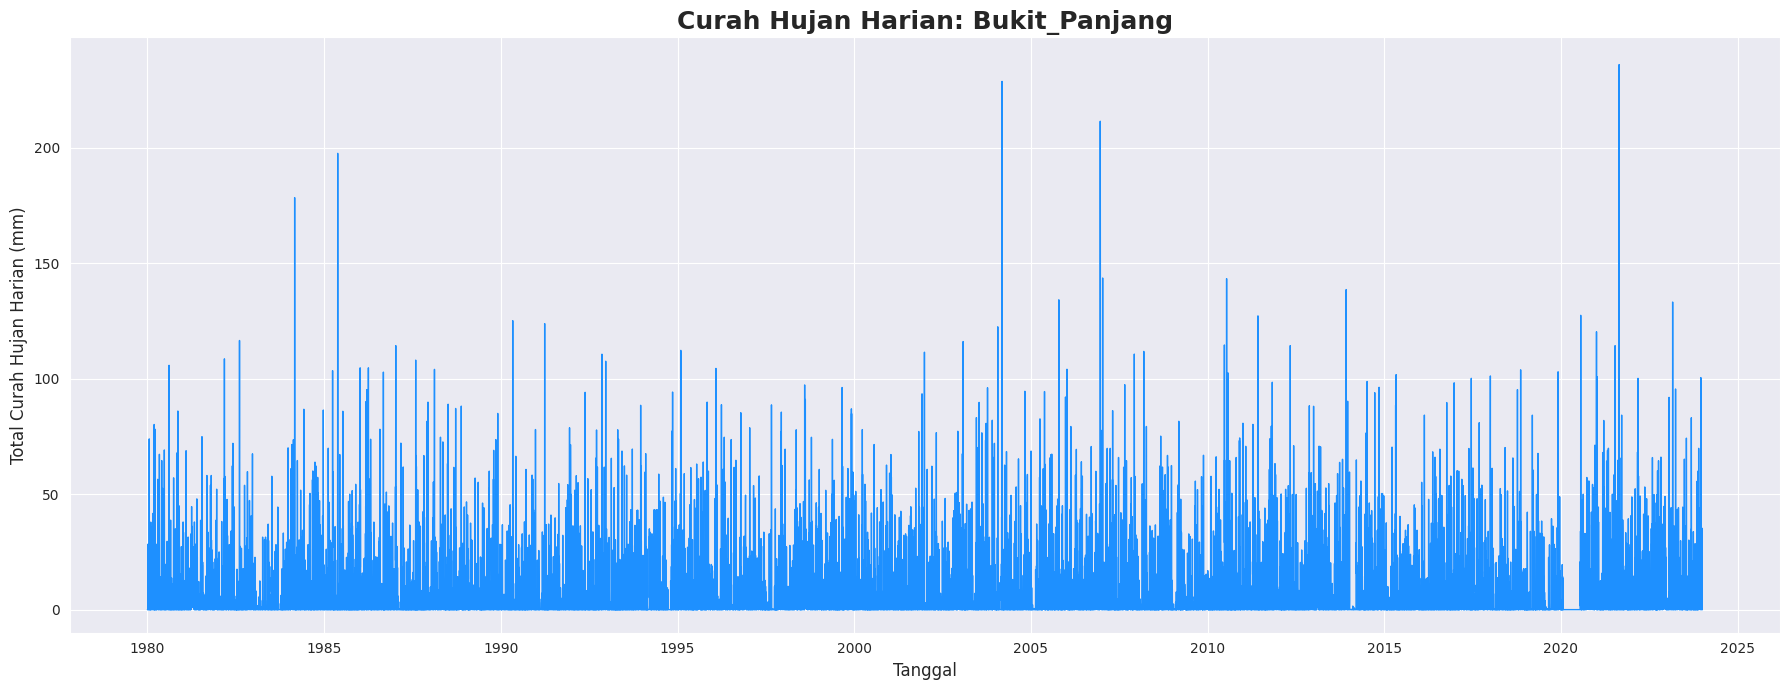

In [239]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

# Path
input_file = '/kaggle/working/ssds-ssf/training_dataset_lengkap.csv'

# Visualize
def tampilkan_plot_satu_lokasi(df, nama_lokasi):
    """
    Membuat dan menampilkan plot time series curah hujan harian
    untuk satu lokasi yang dipilih.
    """
    
    print(f"Mencari data untuk lokasi: '{nama_lokasi}'...")

    df_lokasi = df[df['lokasi'] == nama_lokasi].copy()

    if df_lokasi.empty:
        print(f"❌ Error: Lokasi '{nama_lokasi}' tidak ditemukan di dalam dataset.")
        print(f"Lokasi yang tersedia: {sorted(df['lokasi'].unique())}")
        return

    print(f"-> Data ditemukan. Membuat plot untuk '{nama_lokasi}'...")

    df_lokasi.sort_values('date', inplace=True)

    sns.set_style("darkgrid")

    plt.figure(figsize=(18, 7))

    plt.plot(df_lokasi['date'], df_lokasi['daily_rainfall_total_mm'], color='dodgerblue', linewidth=1)
    plt.title(f'Curah Hujan Harian: {nama_lokasi}', fontsize=18, fontweight='bold')
    plt.xlabel('Tanggal', fontsize=12)
    plt.ylabel('Total Curah Hujan Harian (mm)', fontsize=12)
    plt.ylim(bottom=-10)

    plt.tight_layout()
    plt.show()

# Running
try:
    df_lengkap = pd.read_csv(input_file)
    df_lengkap['date'] = pd.to_datetime(df_lengkap['date'])

    
    lokasi_yang_dipilih = 'Bukit_Panjang'

    
    tampilkan_plot_satu_lokasi(df_lengkap, lokasi_yang_dipilih)

except FileNotFoundError:
    print(f"❌ Error: File dataset tidak ditemukan di '{input_file}'. Pastikan path sudah benar.")

Mencari data untuk lokasi: 'Bukit_Panjang' pada tahun: 2020...
-> Data ditemukan. Membuat plot...


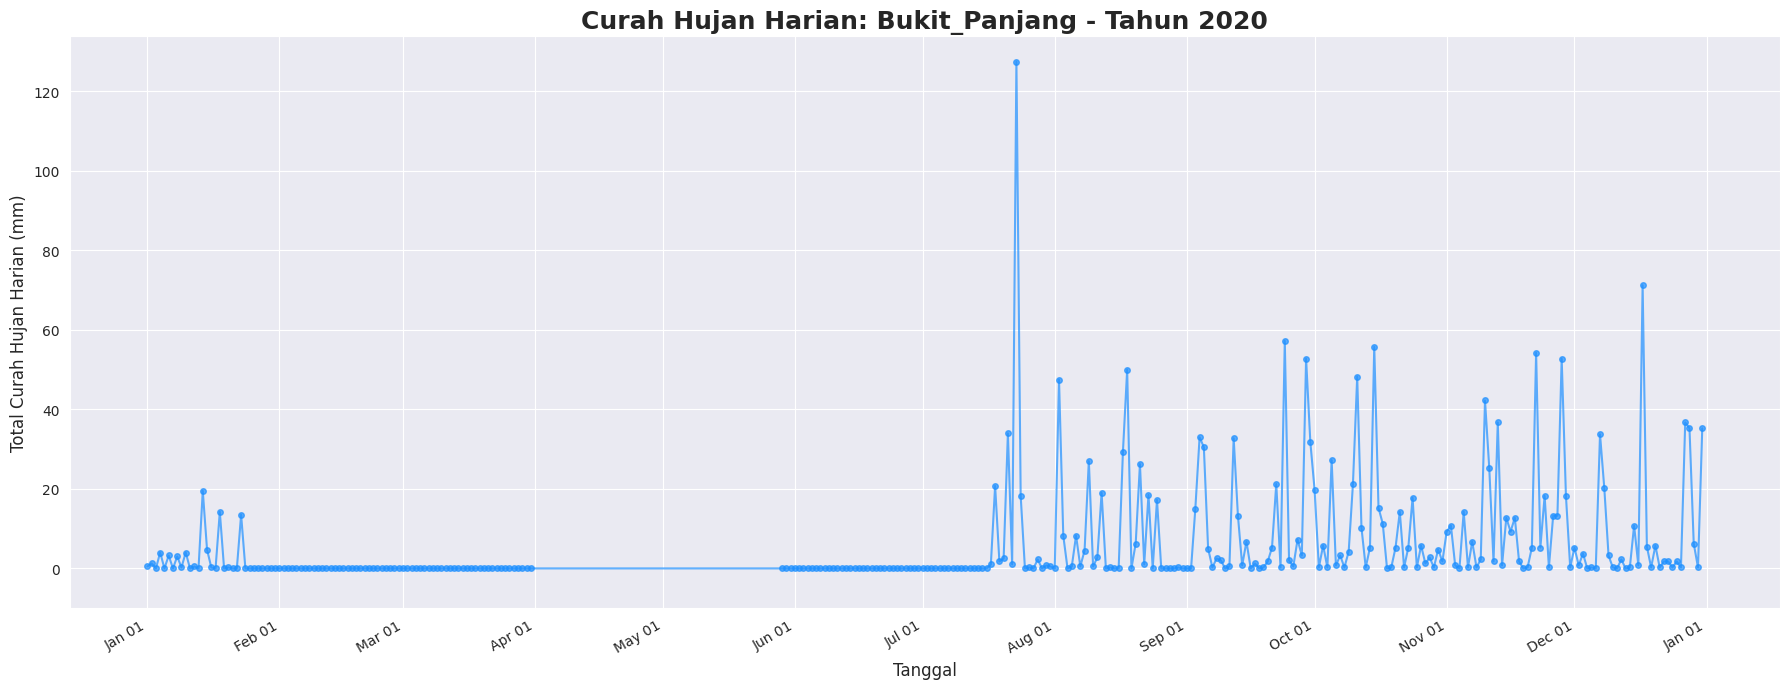

In [240]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

# --- PENGATURAN PATH ---
# Path ke dataset lengkap yang sudah digabung
input_file = '/kaggle/working/ssds-ssf/training_dataset_lengkap.csv'

# --- FUNGSI BARU UNTUK MENAMPILKAN PLOT ---
def tampilkan_plot_per_lokasi_dan_tahun(df, nama_lokasi, tahun):
    """
    Membuat dan menampilkan plot time series curah hujan harian
    untuk satu lokasi dan satu tahun yang dipilih.
    """
    print(f"Mencari data untuk lokasi: '{nama_lokasi}' pada tahun: {tahun}...")

    # 1. Saring data untuk lokasi yang dipilih
    df_lokasi = df[df['lokasi'] == nama_lokasi]

    # Cek apakah lokasi ditemukan
    if df_lokasi.empty:
        print(f"❌ Error: Lokasi '{nama_lokasi}' tidak ditemukan di dalam dataset.")
        return

    # 2. Saring lebih lanjut untuk tahun yang dipilih
    # Pastikan kolom 'date' sudah dalam format datetime
    df_plot = df_lokasi[df_lokasi['date'].dt.year == tahun].copy()

    # Cek apakah data untuk tahun tersebut ada
    if df_plot.empty:
        print(f"❌ Error: Tidak ada data untuk tahun {tahun} di lokasi '{nama_lokasi}'.")
        return

    print(f"-> Data ditemukan. Membuat plot...")

    # Urutkan data berdasarkan tanggal
    df_plot.sort_values('date', inplace=True)

    # 3. Membuat plot
    sns.set_style("darkgrid")
    plt.figure(figsize=(18, 7))

    plt.plot(df_plot['date'], df_plot['daily_rainfall_total_mm'], color='dodgerblue', marker='o', linestyle='-', markersize=4, alpha=0.7)

    # 4. Kustomisasi plot
    plt.title(f'Curah Hujan Harian: {nama_lokasi} - Tahun {tahun}', fontsize=18, fontweight='bold')
    plt.xlabel('Tanggal', fontsize=12)
    plt.ylabel('Total Curah Hujan Harian (mm)', fontsize=12)
    plt.ylim(bottom=-10)

    # Mengatur format tanggal di sumbu-x agar lebih rapi
    plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b %d'))
    plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator())
    plt.gcf().autofmt_xdate() # Memiringkan tanggal agar tidak tumpang tindih

    plt.tight_layout()

    # 5. Tampilkan plot
    plt.show()


# --- JALANKAN PROSES ---

# 1. Baca dataset
try:
    df_lengkap = pd.read_csv(input_file)
    df_lengkap['date'] = pd.to_datetime(df_lengkap['date'])

    # ==========================================================
    # ===> UBAH NAMA LOKASI DAN TAHUN DI SINI UNTUK MENCOBA <===
    lokasi_yang_dipilih = 'Bukit_Panjang'
    tahun_yang_dipilih  = 2020
    # ==========================================================

    # 2. Panggil fungsi untuk membuat dan menampilkan plot
    tampilkan_plot_per_lokasi_dan_tahun(df_lengkap, lokasi_yang_dipilih, tahun_yang_dipilih)

except FileNotFoundError:
    print(f"❌ Error: File dataset tidak ditemukan di '{input_file}'. Pastikan path sudah benar.")

In [241]:
folder_total = '/kaggle/working/ssds-ssf/training_dataset_lengkap.csv'
lengkap = pd.read_csv(folder_total)
lengkap.head()

,date,highest_30_min_rainfall_mm,highest_60_min_rainfall_mm,highest_120_min_rainfall_mm,mean_temperature_c,maximum_temperature_c,minimum_temperature_c,mean_wind_speed_km/h,max_wind_speed_km/h,daily_rainfall_total_mm,lokasi
0,1980-01-01,,,,,,,,,0.000000,Macritchie_Reservoir
1,1980-01-02,,,,,,,,,0.000000,Macritchie_Reservoir
2,1980-01-03,,,,,,,,,0.000000,Macritchie_Reservoir
3,1980-01-04,,,,,,,,,0.000000,Macritchie_Reservoir
4,1980-01-05,,,,,,,,,22.385321,Macritchie_Reservoir


In [242]:
lengkap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416121 entries, 0 to 416120
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   date                         416121 non-null  object 
 1   highest_30_min_rainfall_mm   403151 non-null  object 
 2   highest_60_min_rainfall_mm   403148 non-null  object 
 3   highest_120_min_rainfall_mm  403151 non-null  object 
 4   mean_temperature_c           379428 non-null  object 
 5   maximum_temperature_c        380303 non-null  object 
 6   minimum_temperature_c        380263 non-null  object 
 7   mean_wind_speed_km/h         379149 non-null  object 
 8   max_wind_speed_km/h          379790 non-null  object 
 9   daily_rainfall_total_mm      416121 non-null  float64
 10  lokasi                       416121 non-null  object 
dtypes: float64(1), object(10)
memory usage: 34.9+ MB


In [243]:
# Path
file_path = '/kaggle/working/ssds-ssf/training_dataset_lengkap.csv'
output_file_path = '/kaggle/working/ssds-ssf/training_dataset_dibersihkan.csv'

try:
    df = pd.read_csv(file_path)
    print("--- Tipe Data SEBELUM Perubahan ---")
    df.info()

    kolom_untuk_diubah = [
        'highest_30_min_rainfall_mm',
        'highest_60_min_rainfall_mm',
        'highest_120_min_rainfall_mm',
        'mean_temperature_c',
        'maximum_temperature_c',
        'minimum_temperature_c',
        'mean_wind_speed_km/h',
        'max_wind_speed_km/h'
    ]

    print("\nMemulai proses konversi...")
    for col in kolom_untuk_diubah:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')
            print(f"  -> Kolom '{col}' berhasil diubah ke tipe numerik.")

    df.rename(columns = {'mean_wind_speed_km/h': 'mean_wind_speed_kmh',
                        'max_wind_speed_km/h' : 'max_wind_speed_kmh'},
              inplace = True) 
    
    print("\n--- Tipe Data SETELAH Perubahan ---")
    df.info()

    print(f"\nMenyimpan DataFrame yang sudah dibersihkan ke file baru...")
    df.to_csv(output_file_path, index=False)
    print(f"✅ Berhasil! File baru telah disimpan di: '{output_file_path}'")

except FileNotFoundError:
    print(f"❌ Error: File tidak ditemukan di '{file_path}'. Pastikan path sudah benar.")

--- Tipe Data SEBELUM Perubahan ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416121 entries, 0 to 416120
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   date                         416121 non-null  object 
 1   highest_30_min_rainfall_mm   403151 non-null  object 
 2   highest_60_min_rainfall_mm   403148 non-null  object 
 3   highest_120_min_rainfall_mm  403151 non-null  object 
 4   mean_temperature_c           379428 non-null  object 
 5   maximum_temperature_c        380303 non-null  object 
 6   minimum_temperature_c        380263 non-null  object 
 7   mean_wind_speed_km/h         379149 non-null  object 
 8   max_wind_speed_km/h          379790 non-null  object 
 9   daily_rainfall_total_mm      416121 non-null  float64
 10  lokasi                       416121 non-null  object 
dtypes: float64(1), object(10)
memory usage: 34.9+ MB

Memulai proses konversi...
  ->

## Import Data Eksternal

In [244]:
dipole_mode_index = pd.read_csv('/kaggle/input/ssds-ssf/Data Eksternal/Dipole Mode Index (DMI).csv')
air_quality_index = pd.read_csv('/kaggle/input/ssds-ssf/Data Eksternal/AirQualityIndex_Google Trends.csv')
oceanic_nino_index = pd.read_csv('/kaggle/input/ssds-ssf/Data Eksternal/OceanicNinoIndex (ONI).csv')
relative_humidity = pd.read_csv('/kaggle/input/ssds-ssf/Data Eksternal/RelativeHumidityMonthlyMean.csv')

In [245]:
print("Memulai pra-pemrosesan 4 file data eksternal...")

# --- 1. Pra-pemrosesan DMI ---
print("Memproses DMI...")
# Ganti nama kolom & tangani missing values
dmi = dipole_mode_index.copy()

dmi.rename(columns={dmi.columns[1]: 'dmi_value'}, inplace=True)
dmi['dmi_value'].replace(-9999, np.nan, inplace=True)
dmi['dmi_value'] = dmi['dmi_value'].ffill()
# Buat kunci merge 'tahun_bulan'
dmi['date_dt'] = pd.to_datetime(dmi['Date'])
dmi['tahun_bulan'] = dmi['date_dt'].dt.strftime('%Y-%m')
# Buat fitur lag & rolling
for lag in [1, 2, 3, 6]:
    dmi[f'dmi_lag_{lag}'] = dmi['dmi_value'].shift(lag)
for window in [3, 6, 12]:
    dmi[f'dmi_rolling_mean_{window}'] = dmi['dmi_value'].rolling(window, min_periods=1).mean()
# Pilih kolom final
dmi_final = dmi.drop(columns=['Date', 'date_dt'])

# --- 2. Pra-pemrosesan ONI ---
print("Memproses ONI...")
oni = oceanic_nino_index.copy()

oni.rename(columns={oni.columns[1]: 'oni_value'}, inplace=True)
oni['oni_value'].replace(-9999, np.nan, inplace=True)
oni['oni_value'] = oni['oni_value'].ffill()
# Buat kunci merge 'tahun_bulan'
oni['date_dt'] = pd.to_datetime(oni['Date'], format='%d/%m/%Y')
oni['tahun_bulan'] = oni['date_dt'].dt.strftime('%Y-%m')
# Buat fitur lag & rolling
for lag in [1, 2, 3, 6]:
    oni[f'oni_lag_{lag}'] = oni['oni_value'].shift(lag)
for window in [3, 6, 12]:
    oni[f'oni_rolling_mean_{window}'] = oni['oni_value'].rolling(window, min_periods=1).mean()
# Pilih kolom final
oni_final = oni.drop(columns=['Date', 'date_dt'])

# --- 3. Pra-pemrosesan Relative Humidity ---
print("Memproses Relative Humidity...")
rh = relative_humidity.copy()

rh.rename(columns={'month': 'tahun_bulan', 'mean_rh': 'rh_value'}, inplace=True)
rh['rh_value'] = rh['rh_value'].ffill() # Jaga-jaga jika ada missing value
# Buat fitur lag & rolling
for lag in [1, 2, 3, 6]:
    rh[f'rh_lag_{lag}'] = rh['rh_value'].shift(lag)
for window in [3, 6, 12]:
    rh[f'rh_rolling_mean_{window}'] = rh['rh_value'].rolling(window, min_periods=1).mean()
# Pilih kolom final
rh_final = rh.copy()

# --- 4. Pra-pemrosesan Air Quality Index ---
print("Memproses Air Quality Index...")
aqi = air_quality_index.copy()

aqi.rename(columns={aqi.columns[0]: 'tahun_bulan', aqi.columns[1]: 'aqi_value'}, inplace=True)
aqi['aqi_value'] = aqi['aqi_value'].ffill()
# Buat fitur lag & rolling
for lag in [1, 2, 3, 6]:
    aqi[f'aqi_lag_{lag}'] = aqi['aqi_value'].shift(lag)
for window in [3, 6, 12]:
    aqi[f'aqi_rolling_mean_{window}'] = aqi['aqi_value'].rolling(window, min_periods=1).mean()
# Pilih kolom final
aqi_final = aqi.copy()

# --- 5. Gabungkan semua data eksternal menjadi satu DataFrame ---
print("Menggabungkan semua data eksternal...")
# Mulai dari DMI, lalu gabungkan dengan yang lain satu per satu
external_features = pd.merge(dmi_final, oni_final, on='tahun_bulan', how='left')
external_features = pd.merge(external_features, rh_final, on='tahun_bulan', how='left')
external_features = pd.merge(external_features, aqi_final, on='tahun_bulan', how='left')

# Isi NaN di awal data (akibat proses lag/rolling) dengan forward/backward fill
external_features = external_features.ffill().bfill()
external_features['tahun_bulan'] = pd.to_datetime(external_features['tahun_bulan']) 

print("\n✅ Pra-pemrosesan data eksternal selesai.")
print(f"Total fitur eksternal yang dibuat: {external_features.shape[1] - 1}")
print("\nContoh 5 baris pertama dari data eksternal yang siap digabung:")
external_features.head()

Memulai pra-pemrosesan 4 file data eksternal...
Memproses DMI...
Memproses ONI...
Memproses Relative Humidity...
Memproses Air Quality Index...
Menggabungkan semua data eksternal...

✅ Pra-pemrosesan data eksternal selesai.
Total fitur eksternal yang dibuat: 32

Contoh 5 baris pertama dari data eksternal yang siap digabung:


,dmi_value,tahun_bulan,dmi_lag_1,dmi_lag_2,dmi_lag_3,dmi_lag_6,dmi_rolling_mean_3,dmi_rolling_mean_6,dmi_rolling_mean_12,oni_value,...,rh_rolling_mean_6,rh_rolling_mean_12,aqi_value,aqi_lag_1,aqi_lag_2,aqi_lag_3,aqi_lag_6,aqi_rolling_mean_3,aqi_rolling_mean_6,aqi_rolling_mean_12
0,-0.438,1870-01-01,-0.438,-0.438,-0.438,-0.438,-0.438,-0.43800,-0.43800,-1.53,...,81.2,81.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.336,1870-02-01,-0.438,-0.438,-0.438,-0.438,-0.387,-0.38700,-0.38700,-1.53,...,81.2,81.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.177,1870-03-01,-0.336,-0.438,-0.438,-0.438,-0.199,-0.19900,-0.19900,-1.53,...,81.2,81.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.048,1870-04-01,0.177,-0.336,-0.438,-0.438,-0.069,-0.16125,-0.16125,-1.53,...,81.2,81.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.480,1870-05-01,-0.048,0.177,-0.336,-0.438,-0.117,-0.22500,-0.22500,-1.53,...,81.2,81.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [246]:
external_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1872 entries, 0 to 1871
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   dmi_value            1872 non-null   float64       
 1   tahun_bulan          1872 non-null   datetime64[ns]
 2   dmi_lag_1            1872 non-null   float64       
 3   dmi_lag_2            1872 non-null   float64       
 4   dmi_lag_3            1872 non-null   float64       
 5   dmi_lag_6            1872 non-null   float64       
 6   dmi_rolling_mean_3   1872 non-null   float64       
 7   dmi_rolling_mean_6   1872 non-null   float64       
 8   dmi_rolling_mean_12  1872 non-null   float64       
 9   oni_value            1872 non-null   float64       
 10  oni_lag_1            1872 non-null   float64       
 11  oni_lag_2            1872 non-null   float64       
 12  oni_lag_3            1872 non-null   float64       
 13  oni_lag_6            1872 non-nul

In [247]:
train_clean = pd.read_csv('/kaggle/working/ssds-ssf/training_dataset_dibersihkan.csv')
train_clean.head()

,date,highest_30_min_rainfall_mm,highest_60_min_rainfall_mm,highest_120_min_rainfall_mm,mean_temperature_c,maximum_temperature_c,minimum_temperature_c,mean_wind_speed_kmh,max_wind_speed_kmh,daily_rainfall_total_mm,lokasi
0,1980-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,Macritchie_Reservoir
1,1980-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,Macritchie_Reservoir
2,1980-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,Macritchie_Reservoir
3,1980-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,Macritchie_Reservoir
4,1980-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.385321,Macritchie_Reservoir


In [248]:
train_clean['date'] = pd.to_datetime(train_clean['date'], format = 'mixed')
train_clean['tahun_bulan'] = train_clean['date'].dt.strftime('%Y-%m')
train_clean['tahun_bulan'] = pd.to_datetime(train_clean['tahun_bulan'])
train_clean = pd.merge(train_clean, external_features, on = 'tahun_bulan', how = 'left')

train_clean.drop(columns = ['tahun_bulan'], inplace = True)

In [249]:
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416121 entries, 0 to 416120
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   date                         416121 non-null  datetime64[ns]
 1   highest_30_min_rainfall_mm   135603 non-null  float64       
 2   highest_60_min_rainfall_mm   135600 non-null  float64       
 3   highest_120_min_rainfall_mm  135603 non-null  float64       
 4   mean_temperature_c           117569 non-null  float64       
 5   maximum_temperature_c        136855 non-null  float64       
 6   minimum_temperature_c        136808 non-null  float64       
 7   mean_wind_speed_kmh          136259 non-null  float64       
 8   max_wind_speed_kmh           101303 non-null  float64       
 9   daily_rainfall_total_mm      416121 non-null  float64       
 10  lokasi                       416121 non-null  object        
 11  dmi_value                 

## Data Test

In [250]:
import pandas as pd
import os
import glob
import re # Diperlukan untuk pembersihan nama kolom

# --- PENGATURAN PATH ---
base_train_path = '../input/ssds-ssf/Test'
output_path = '/kaggle/working/ssds-ssf/Test_Gabungan_Dibersihkan'

# --- FUNGSI PEMBERSIH NAMA KOLOM ---
def clean_column_names(df):
    """
    Membersihkan dan menyeragamkan nama kolom pada DataFrame.
    """
    new_columns = []
    for col in df.columns:
        cleaned_col = col.strip().replace(' ', '_').lower()
        cleaned_col = re.sub(r'[().%°]', '', cleaned_col)
        new_columns.append(cleaned_col)
    df.columns = new_columns
    return df

# --- LOGIKA UTAMA ---
def proses_semua_lokasi(path_induk, path_keluaran):
    """
    Melakukan loop ke semua folder, menggabungkan CSV, membersihkan nama kolom,
    dan menyimpan hasilnya.
    """
    print("Memulai proses otomatis untuk semua lokasi...")
    os.makedirs(path_keluaran, exist_ok=True)
    print(f"Folder output dipastikan ada di: {path_keluaran}")

    try:
        folder_lokasi = [f.name for f in os.scandir(path_induk) if f.is_dir()]
        print(f"Ditemukan {len(folder_lokasi)} folder lokasi untuk diproses.")
    except FileNotFoundError:
        print(f"❌ Error: Direktori induk tidak ditemukan di '{path_induk}'. Hentikan proses.")
        return

    for nama_lokasi in folder_lokasi:
        print(f"\n-> Memproses: '{nama_lokasi}'...")

        path_lokasi_spesifik = os.path.join(path_induk, nama_lokasi)
        daftar_file_csv = sorted(glob.glob(os.path.join(path_lokasi_spesifik, "*.csv")))

        if not daftar_file_csv:
            print(f"  -- Lewati '{nama_lokasi}', tidak ada file .csv ditemukan.")
            continue

        # PENTING: Lakukan pembersihan nama kolom SEBELUM digabung
        list_of_dfs = []
        for file in daftar_file_csv:
            df = pd.read_csv(file)
            # Langsung bersihkan nama kolom setelah file dibaca
            df = clean_column_names(df)
            list_of_dfs.append(df)

        # Gabungkan DataFrame yang nama kolomnya sudah seragam
        df_gabungan = pd.concat(list_of_dfs, ignore_index=True)

        # Cek jumlah kolom setelah digabung
        print(f"  -> Jumlah kolom setelah digabung: {len(df_gabungan.columns)}")

        nama_file_output = f"{nama_lokasi}_gabungan_bersih.csv"
        path_file_output = os.path.join(path_keluaran, nama_file_output)

        df_gabungan.to_csv(path_file_output, index=False)
        print(f"  ✅ Berhasil! Data dengan kolom bersih disimpan di: '{nama_file_output}'")

    print("\n\n🎉 Semua proses selesai!")

# --- JALANKAN PROSES ---
proses_semua_lokasi(base_train_path, output_path)

Memulai proses otomatis untuk semua lokasi...
Folder output dipastikan ada di: /kaggle/working/ssds-ssf/Test_Gabungan_Dibersihkan
Ditemukan 44 folder lokasi untuk diproses.

-> Memproses: 'Queenstown'...
  -> Jumlah kolom setelah digabung: 9
  ✅ Berhasil! Data dengan kolom bersih disimpan di: 'Queenstown_gabungan_bersih.csv'

-> Memproses: 'Ulu_Pandan'...
  -> Jumlah kolom setelah digabung: 9
  ✅ Berhasil! Data dengan kolom bersih disimpan di: 'Ulu_Pandan_gabungan_bersih.csv'

-> Memproses: 'Jurong_Island'...
  -> Jumlah kolom setelah digabung: 9
  ✅ Berhasil! Data dengan kolom bersih disimpan di: 'Jurong_Island_gabungan_bersih.csv'

-> Memproses: 'Seletar'...
  -> Jumlah kolom setelah digabung: 9
  ✅ Berhasil! Data dengan kolom bersih disimpan di: 'Seletar_gabungan_bersih.csv'

-> Memproses: 'Jurong_Pier'...
  -> Jumlah kolom setelah digabung: 9
  ✅ Berhasil! Data dengan kolom bersih disimpan di: 'Jurong_Pier_gabungan_bersih.csv'

-> Memproses: 'Tuas_South'...
  -> Jumlah kolom setela

In [251]:
bukit_panjang_test = pd.read_csv('/kaggle/working/ssds-ssf/Test_Gabungan_Dibersihkan/Bukit_Panjang_gabungan_bersih.csv')
bukit_panjang_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   date                         517 non-null    object 
 1   highest_30_min_rainfall_mm   511 non-null    float64
 2   highest_60_min_rainfall_mm   512 non-null    float64
 3   highest_120_min_rainfall_mm  512 non-null    float64
 4   mean_temperature_c           0 non-null      float64
 5   maximum_temperature_c        0 non-null      float64
 6   minimum_temperature_c        0 non-null      float64
 7   mean_wind_speed_km/h         0 non-null      float64
 8   max_wind_speed_km/h          0 non-null      float64
dtypes: float64(8), object(1)
memory usage: 36.5+ KB


In [252]:
import pandas as pd
import os
import glob
import re
import numpy as np # Import numpy untuk menggunakan np.nan

# --- PENGATURAN PATH ---
# Path utama ke folder Test Anda
base_test_path = '../input/ssds-ssf/Test/'
# Path dan nama file untuk output final dataset test
output_file = '/kaggle/working/ssds-ssf/testing_dataset_lengkap.csv'

# --- FUNGSI PEMBERSIH NAMA KOLOM ---
def clean_column_names(df):
    """Membersihkan dan menyeragamkan nama kolom pada DataFrame."""
    new_columns = []
    for col in df.columns:
        cleaned_col = col.strip().replace(' ', '_').lower()
        cleaned_col = re.sub(r'[().%°/]', '', cleaned_col)
        new_columns.append(cleaned_col)
    df.columns = new_columns
    return df

# --- LOGIKA UTAMA ---
def proses_data_test(path_induk, path_output):
    """
    Menggabungkan semua file CSV dari folder Test, membersihkannya,
    dan menambahkan kolom kosong untuk prediksi.
    """
    print("Memulai proses pembuatan dataset test final...")
    try:
        folder_lokasi = [f.name for f in os.scandir(path_induk) if f.is_dir()]
        print(f"Ditemukan {len(folder_lokasi)} folder lokasi untuk diproses.")
    except FileNotFoundError:
        print(f"❌ Error: Direktori Test tidak ditemukan di '{path_induk}'. Hentikan proses.")
        return

    all_locations_data = []
    for nama_lokasi in folder_lokasi:
        print(f"  -> Memproses: '{nama_lokasi}'...")
        path_lokasi_spesifik = os.path.join(path_induk, nama_lokasi)
        daftar_file_csv = sorted(glob.glob(os.path.join(path_lokasi_spesifik, "*.csv")))
        if not daftar_file_csv:
            continue

        list_of_dfs = []
        for file in daftar_file_csv:
            df = pd.read_csv(file)
            df = clean_column_names(df)
            list_of_dfs.append(df)

        df_gabungan_lokasi = pd.concat(list_of_dfs, ignore_index=True)
        df_gabungan_lokasi['lokasi'] = nama_lokasi
        all_locations_data.append(df_gabungan_lokasi)

    if not all_locations_data:
        print("Tidak ada data yang berhasil diproses.")
        return

    final_test_dataset = pd.concat(all_locations_data, ignore_index=True)

    print("\nMenyeragamkan tipe data...")
    kolom_untuk_diubah = [
        'highest_30_min_rainfall_mm', 'highest_60_min_rainfall_mm',
        'highest_120_min_rainfall_mm', 'mean_temperature_c',
        'maximum_temperature_c', 'minimum_temperature_c',
        'mean_wind_speed_km/h', 'max_wind_speed_km/h'
    ]
    for col in kolom_untuk_diubah:
        if col in final_test_dataset.columns:
            final_test_dataset[col] = pd.to_numeric(final_test_dataset[col], errors='coerce')

    final_test_dataset['date'] = pd.to_datetime(final_test_dataset['date'])

    # ==========================================================
    # ===> TAMBAHKAN KOLOM KOSONG UNTUK PREDIKSI <===
    # ==========================================================
    final_test_dataset['daily_rainfall_total_mm'] = np.nan
    print("-> Kolom 'daily_rainfall_total_mm' kosong berhasil ditambahkan.")

    # 4. Simpan dataset final
    final_test_dataset.to_csv(path_output, index=False)

    print("\n\n🎉 Dataset test final berhasil dibuat!")
    print(f"Disimpan di: {path_output}")
    print("\n--- Informasi Dataset Final Test (dengan kolom prediksi) ---")
    final_test_dataset.info()

# --- JALANKAN PROSES ---
proses_data_test(base_test_path, output_file)

Memulai proses pembuatan dataset test final...
Ditemukan 44 folder lokasi untuk diproses.
  -> Memproses: 'Queenstown'...
  -> Memproses: 'Ulu_Pandan'...
  -> Memproses: 'Jurong_Island'...
  -> Memproses: 'Seletar'...
  -> Memproses: 'Jurong_Pier'...
  -> Memproses: 'Tuas_South'...
  -> Memproses: 'Pasir_Ris_Central'...
  -> Memproses: 'Kent_Ridge'...
  -> Memproses: 'Paya_Lebar'...
  -> Memproses: 'Toa_Payoh'...
  -> Memproses: 'Tanjong_Katong'...
  -> Memproses: 'Mandai'...
  -> Memproses: 'Choa_Chu_Kang_South'...
  -> Memproses: 'East_Coast_Parkway'...
  -> Memproses: 'Choa_Chu_Kang_Central'...
  -> Memproses: 'Admiralty'...
  -> Memproses: 'Upper_Peirce_Reservoir'...
  -> Memproses: 'Marina_Barrage'...
  -> Memproses: 'Clementi'...
  -> Memproses: 'Marine_Parade'...
  -> Memproses: 'Somerset_Road'...
  -> Memproses: 'Lower_Peirce_Reservoir'...
  -> Memproses: 'Whampoa'...
  -> Memproses: 'Simei'...
  -> Memproses: 'Jurong_West'...
  -> Memproses: 'Lim_Chu_Kang'...
  -> Memproses: '

In [253]:
test_merged = pd.read_csv('/kaggle/working/ssds-ssf/testing_dataset_lengkap.csv')
test_merged.head()

,date,highest_30_min_rainfall_mm,highest_60_min_rainfall_mm,highest_120_min_rainfall_mm,mean_temperature_c,maximum_temperature_c,minimum_temperature_c,mean_wind_speed_kmh,max_wind_speed_kmh,lokasi,daily_rainfall_total_mm
0,2024-01-01,2.4,3.2,3.4,NaN,NaN,NaN,NaN,NaN,Queenstown,NaN
1,2024-01-02,3.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,Queenstown,NaN
2,2024-01-03,0.2,0.2,0.2,NaN,NaN,NaN,NaN,NaN,Queenstown,NaN
3,2024-01-04,5.8,10.0,14.6,NaN,NaN,NaN,NaN,NaN,Queenstown,NaN
4,2024-01-05,4.6,5.8,5.8,NaN,NaN,NaN,NaN,NaN,Queenstown,NaN


In [254]:
test_merged['date'] = pd.to_datetime(test_merged['date'])
test_merged['tahun_bulan'] = test_merged['date'].dt.strftime('%Y-%m')
test_merged['tahun_bulan'] = pd.to_datetime(test_merged['tahun_bulan'])
test_merged = pd.merge(test_merged, external_features, on = 'tahun_bulan', how = 'left')

test_merged.drop(columns = ['tahun_bulan'], inplace = True)

In [255]:
test_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22748 entries, 0 to 22747
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   date                         22748 non-null  datetime64[ns]
 1   highest_30_min_rainfall_mm   21911 non-null  float64       
 2   highest_60_min_rainfall_mm   21953 non-null  float64       
 3   highest_120_min_rainfall_mm  21953 non-null  float64       
 4   mean_temperature_c           8999 non-null   float64       
 5   maximum_temperature_c        8976 non-null   float64       
 6   minimum_temperature_c        8976 non-null   float64       
 7   mean_wind_speed_kmh          8033 non-null   float64       
 8   max_wind_speed_kmh           8033 non-null   float64       
 9   lokasi                       22748 non-null  object        
 10  daily_rainfall_total_mm      0 non-null      float64       
 11  dmi_value                    22748 non-nu

In [256]:
def create_features(df):
    """
    Membuat fitur-fitur baru pada DataFrame cuaca.
    """
    # Salin DataFrame untuk menghindari SettingWithCopyWarning
    df = df.copy()

    # 1. Pastikan kolom 'date' dalam format datetime
    df['date'] = pd.to_datetime(df['date'])

    # --- 1. Ekstraksi Fitur Waktu ---
    print("Membuat fitur waktu...")
    df['month'] = df['date'].dt.month
    df['day_of_week'] = df['date'].dt.dayofweek
    df['day_of_year'] = df['date'].dt.dayofyear
    df['week_of_year'] = df['date'].dt.isocalendar().week.astype(int)

    # --- 2. Rentang Temperatur Harian ---
    print("Membuat rentang temperatur harian...")
    df['temp_range_c'] = df['maximum_temperature_c'] - df['minimum_temperature_c']

    # --- 3. Faktor Hembusan Angin ---
    print("Membuat faktor hembusan angin...")
    # Ganti pembagian dengan nol atau NaN dengan 1 (menandakan angin stabil)
    df['wind_gust_factor'] = df['max_wind_speed_kmh'] / df['mean_wind_speed_kmh']
    df['wind_gust_factor'].replace([np.inf, -np.inf], np.nan, inplace=True)
    df['wind_gust_factor'].fillna(1, inplace=True)

    # --- 4. Rasio Intensitas Hujan ---
    print("Membuat rasio intensitas hujan...")
    # Ganti pembagian dengan nol atau NaN dengan 1 (menandakan intensitas stabil)
    df['rain_intensity_ratio'] = df['highest_60_min_rainfall_mm'] / df['highest_30_min_rainfall_mm']
    df['rain_intensity_ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)
    df['rain_intensity_ratio'].fillna(1, inplace=True)

    # --- 5. Fitur Lag (Data 1 hari sebelumnya) ---
    print("Membuat fitur lag...")
    df = df.sort_values(by='date').reset_index(drop=True) # Pastikan data terurut sebelum membuat lag
    lag_features = ['mean_temperature_c', 'highest_60_min_rainfall_mm', 'mean_wind_speed_kmh']
    for feature in lag_features:
        df[f'{feature}_lag1'] = df[feature].shift(1)

    # --- 6. Statistik Bergulir (Rolling Statistics) ---
    print("Membuat statistik bergulir...")
    df['mean_temp_roll_7d'] = df['mean_temperature_c'].rolling(window=7, min_periods=1).mean()
    df['max_rain_roll_3d'] = df['highest_60_min_rainfall_mm'].rolling(window=3, min_periods=1).max()
    df['mean_wind_roll_7d'] = df['mean_wind_speed_kmh'].rolling(window=7, min_periods=1).mean()

    # --- FITUR SIKLUS & INTERAKSI AWAL ---
    days_in_year = 366
    df['day_of_year_sin'] = np.sin(2 * np.pi * df['day_of_year'] / days_in_year)
    df['day_of_year_cos'] = np.cos(2 * np.pi * df['day_of_year'] / days_in_year)
    df['wind_x_rain'] = df['mean_wind_speed_kmh'] * df['highest_60_min_rainfall_mm']

    # --- FITUR BARU DARI DATA EKSTERNAL ---
    print("Menambahkan fitur interaksi dari data eksternal...")
    
    # 1. Interaksi ONI & Temperatur
    df['oni_x_temp'] = df['oni_value'] * df['mean_temperature_c']
    
    # 2. Interaksi DMI & Hujan
    df['dmi_x_rainfall'] = df['dmi_value'] * df['highest_60_min_rainfall_mm']
    
    # 3. Proxy Indeks Panas (RH & Temperatur)
    df['heat_index_proxy'] = df['rh_value'] * df['mean_temperature_c']
    
    # 4. Interaksi AQI & Rentang Temperatur
    df['aqi_x_temp_range'] = df['aqi_value'] * df['temp_range_c']
    print("-" * 30)
    return df

train_featured = create_features(train_clean)
test_featured = create_features(test_merged)

Membuat fitur waktu...
Membuat rentang temperatur harian...
Membuat faktor hembusan angin...
Membuat rasio intensitas hujan...
Membuat fitur lag...
Membuat statistik bergulir...
Menambahkan fitur interaksi dari data eksternal...
------------------------------
Membuat fitur waktu...
Membuat rentang temperatur harian...
Membuat faktor hembusan angin...
Membuat rasio intensitas hujan...
Membuat fitur lag...
Membuat statistik bergulir...
Menambahkan fitur interaksi dari data eksternal...
------------------------------


In [257]:
train_featured.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416121 entries, 0 to 416120
Data columns (total 63 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   date                             416121 non-null  datetime64[ns]
 1   highest_30_min_rainfall_mm       135603 non-null  float64       
 2   highest_60_min_rainfall_mm       135600 non-null  float64       
 3   highest_120_min_rainfall_mm      135603 non-null  float64       
 4   mean_temperature_c               117569 non-null  float64       
 5   maximum_temperature_c            136855 non-null  float64       
 6   minimum_temperature_c            136808 non-null  float64       
 7   mean_wind_speed_kmh              136259 non-null  float64       
 8   max_wind_speed_kmh               101303 non-null  float64       
 9   daily_rainfall_total_mm          416121 non-null  float64       
 10  lokasi                           416121 non-

In [258]:
test_featured.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22748 entries, 0 to 22747
Data columns (total 63 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   date                             22748 non-null  datetime64[ns]
 1   highest_30_min_rainfall_mm       21911 non-null  float64       
 2   highest_60_min_rainfall_mm       21953 non-null  float64       
 3   highest_120_min_rainfall_mm      21953 non-null  float64       
 4   mean_temperature_c               8999 non-null   float64       
 5   maximum_temperature_c            8976 non-null   float64       
 6   minimum_temperature_c            8976 non-null   float64       
 7   mean_wind_speed_kmh              8033 non-null   float64       
 8   max_wind_speed_kmh               8033 non-null   float64       
 9   lokasi                           22748 non-null  object        
 10  daily_rainfall_total_mm          0 non-null      float64  

## Modelling

In [259]:
import lightgbm as lgb
import optuna
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import warnings

warnings.filterwarnings('ignore')

print("Tahap 1: Memuat dataset...")
try:
    train_df = train_featured.copy()
    test_df = test_featured.copy()

    train_df['date'] = pd.to_datetime(train_df['date'])
    test_df['date'] = pd.to_datetime(test_df['date'])

    print("✅ Dataset berhasil dimuat.")
    print(f"Jumlah baris data training asli: {len(train_df)}")
    print(f"Jumlah baris data testing asli: {len(test_df)}")

except FileNotFoundError as e:
    print(f"❌ Error: File tidak ditemukan. Pastikan path '/kaggle/input/nama-dataset-anda/...' sudah benar. Detail: {e}")
    exit()

print("\nTahap 2: Mengisi nilai yang hilang (Imputasi)...")

# Urutkan data terlebih dahulu untuk imputasi yang benar
train_df = train_df.sort_values(by=['lokasi', 'date'])
test_df = test_df.sort_values(by=['lokasi', 'date'])

kolom_fitur_imputasi = [col for col in train_df.columns if col not in ['date', 'daily_rainfall_total_mm', 'lokasi']]

for col in kolom_fitur_imputasi:
    train_df[col] = train_df.groupby('lokasi')[col].transform(lambda x: x.ffill().bfill())
    if col in test_df.columns:
        test_df[col] = test_df.groupby('lokasi')[col].transform(lambda x: x.ffill().bfill())

print("✅ Proses imputasi selesai.")
print("\nTahap 3: Membuat fitur-fitur baru untuk model...")

train_df['source'] = 'train'
test_df['source'] = 'test'

combined_df = pd.concat([train_df, test_df], sort=False, ignore_index=True)

def create_time_series_features(df):
    """Membuat fitur lag, rolling window, dan berbasis tanggal pada data gabungan."""
    df = df.copy()
    df = df.sort_values(by=['lokasi', 'date']).reset_index(drop=True)

    # Fitur berbasis tanggal
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    df['dayofweek'] = df['date'].dt.dayofweek
    df['dayofyear'] = df['date'].dt.dayofyear
    df['weekofyear'] = df['date'].dt.isocalendar().week.astype(int)

    features_to_process = ['daily_rainfall_total_mm', 'mean_temperature_c', 'maximum_temperature_c']
    for feature in features_to_process:
        for lag in [7, 14, 30]:
            df[f'{feature}_lag_{lag}'] = df.groupby('lokasi')[feature].shift(lag)
        for window in [7, 14, 30]:
            rolling_series = df.groupby('lokasi')[feature].shift(1).rolling(window, min_periods=1)
            df[f'{feature}_rolling_mean_{window}'] = rolling_series.mean()
            df[f'{feature}_rolling_std_{window}'] = rolling_series.std()
    return df

full_df = create_time_series_features(combined_df)
full_df = pd.get_dummies(full_df, columns=['lokasi'], prefix='lokasi', dtype=int)

print("✅ Rekayasa fitur selesai.")
print("\nTahap 4: Mempersiapkan data dan melatih model LightGBM...")

train_final = full_df[full_df['source'] == 'train'].copy()
test_final = full_df[full_df['source'] == 'test'].copy()

train_final.drop(columns=['source'], inplace=True)
test_final.drop(columns=['source'], inplace=True)

print(f"Jumlah baris data training setelah diproses: {len(train_final)}")
print(f"Jumlah baris data testing setelah diproses: {len(test_final)}")

# Definisikan fitur dan target
TARGET = 'daily_rainfall_total_mm'
features = [col for col in train_final.columns if col not in ['date', TARGET]]

X_train = train_final[features]
y_train = train_final[TARGET]
X_test = test_final[features]

X_train = X_train.fillna(-999)
X_test = X_test.fillna(-999)

lgbm_params = {
    'objective': 'regression_l1',
    'metric': 'rmse',
    'n_estimators': 2500,
    'learning_rate': 0.01,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 1,
    'lambda_l1': 0.1,
    'lambda_l2': 0.1,
    'num_leaves': 40,
    'verbose': -1,
    'n_jobs': -1,
    'seed': 42,
    'boosting_type': 'gbdt',
}

model = lgb.LGBMRegressor(**lgbm_params)

# Training with early stopping
model.fit(X_train, y_train,
          eval_set=[(X_train, y_train)],
          eval_metric='rmse',
          callbacks=[lgb.early_stopping(150, verbose=False)])

print("✅ Model berhasil dilatih.")
print("\nTahap 5: Melakukan prediksi dan membuat file submission...")

predictions = model.predict(X_test)
predictions[predictions < 0] = 0

lokasi_cols = [col for col in test_final.columns if col.startswith('lokasi_')]
test_final['lokasi_asal'] = test_final[lokasi_cols].idxmax(axis=1).str.replace('lokasi_', '')

submission_id = test_final['lokasi_asal'] + '_' + test_final['date'].dt.strftime('%Y-%m-%d')

submission_df = pd.DataFrame({
    'id': submission_id,
    'Daily Rainfall Total (mm)': predictions
})

submission_filename = 'submission_LGBM_final.csv'
submission_df.to_csv(submission_filename, index=False)

print(f"\n🎉 File submission berhasil dibuat: '{submission_filename}'")
print(f"Jumlah baris file submission: {len(submission_df)}")
print("\nContoh 5 baris pertama hasil prediksi:")
print(submission_df.head())

Tahap 1: Memuat dataset...
✅ Dataset berhasil dimuat.
Jumlah baris data training asli: 416121
Jumlah baris data testing asli: 22748

Tahap 2: Mengisi nilai yang hilang (Imputasi)...
✅ Proses imputasi selesai.

Tahap 3: Membuat fitur-fitur baru untuk model...
✅ Rekayasa fitur selesai.

Tahap 4: Mempersiapkan data dan melatih model LightGBM...
Jumlah baris data training setelah diproses: 416121
Jumlah baris data testing setelah diproses: 22748
✅ Model berhasil dilatih.

Tahap 5: Melakukan prediksi dan membuat file submission...

🎉 File submission berhasil dibuat: 'submission_LGBM_final.csv'
Jumlah baris file submission: 22748

Contoh 5 baris pertama hasil prediksi:
                        id  Daily Rainfall Total (mm)
5448  Admiralty_2024-01-01                   6.471085
5449  Admiralty_2024-01-02                   1.155617
5450  Admiralty_2024-01-03                   1.484472
5451  Admiralty_2024-01-04                  37.191036
5452  Admiralty_2024-01-05                   6.069777


In [260]:
submission_df

,id,Daily Rainfall Total (mm)
5448,Admiralty_2024-01-01,6.471085
5449,Admiralty_2024-01-02,1.155617
5450,Admiralty_2024-01-03,1.484472
5451,Admiralty_2024-01-04,37.191036
5452,Admiralty_2024-01-05,6.069777
...,...,...
438864,Whampoa_2025-05-27,0.000000
438865,Whampoa_2025-05-28,0.000000
438866,Whampoa_2025-05-29,2.772801
438867,Whampoa_2025-05-30,0.000000


In [261]:
final = pd.read_csv('submission_LGBM_final.csv')
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22748 entries, 0 to 22747
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         22748 non-null  object 
 1   Daily Rainfall Total (mm)  22748 non-null  float64
dtypes: float64(1), object(1)
memory usage: 355.6+ KB


In [262]:
final.head()

,id,Daily Rainfall Total (mm)
0,Admiralty_2024-01-01,6.471085
1,Admiralty_2024-01-02,1.155617
2,Admiralty_2024-01-03,1.484472
3,Admiralty_2024-01-04,37.191036
4,Admiralty_2024-01-05,6.069777


In [263]:
final.iloc[700]

id                           Ang_Mo_Kio_2024-07-02
Daily Rainfall Total (mm)                 0.512518
Name: 700, dtype: object

In [264]:
import pandas as pd
from google.colab import files # Library khusus Google Colab untuk download file

# --- PENGATURAN ---
# Ganti nama file ini dengan nama file hasil prediksi Anda yang memiliki kolom:
# 'id' dan 'Daily Rainfall Total (mm)'
file_untuk_diubah = 'submission_LGBM_final.csv'

# Nama file output yang akan di-download
file_submission_final = 'submission.csv'

# --- PROSES ---
try:
    nama_kolom_sumber = 'id'
    
    # 1. Pisahkan nama kota dan tanggal mentah
    #    Ini akan membuat dua kolom sementara: 'kota_raw' dan 'tanggal_raw'
    final[['kota_raw', 'tanggal_raw']] = final[nama_kolom_sumber].str.rsplit('_', n=1, expand=True)
    
    # 2. Ubah kolom tanggal mentah menjadi tipe datetime
    #    Ini membuat kolom sementara 'tanggal_dt'
    final['tanggal_dt'] = pd.to_datetime(final['tanggal_raw'])
    
    # 3. Buat semua kolom baru yang diinginkan
    final['ID (kota)'] = final['kota_raw'].str.lower() + '_' + final['tanggal_raw'].str.replace('-', '_')
    final['tahun'] = final['tanggal_dt'].dt.year
    final['bulan'] = final['tanggal_dt'].dt.month
    final['hari'] = final['tanggal_dt'].dt.day
    final.rename(columns = {'Daily Rainfall Total (mm)': 'prediksi'}, inplace = True)
    
    # 4. Hapus kolom-kolom sementara yang sudah tidak diperlukan lagi
    final.drop(columns=['kota_raw', 'tanggal_raw', 'tanggal_dt', 'id'], inplace=True)

    # 6. Simpan ke file CSV baru
    print(f"Menyimpan hasil ke '{file_submission_final}'...")
    final.to_csv(file_submission_final, index=False)

    # 7. Sediakan file untuk di-download
    print("\n✅ Proses selesai. File siap untuk di-download.")
    # Note: files.download() will trigger a download in the browser when run in Colab
    # files.download(file_submission_final) # Uncomment this line if you want to auto-download

except FileNotFoundError:
    print(f"❌ Error: File '{file_untuk_diubah}' tidak ditemukan.")
    print("Pastikan Anda sudah meng-upload file tersebut atau nama filenya sudah benar.")
except Exception as e:
    print(f"❌ An unexpected error occurred: {e}")

Menyimpan hasil ke 'submission.csv'...

✅ Proses selesai. File siap untuk di-download.


In [265]:
final_submission = pd.read_csv('submission.csv')
prediksi = final_submission['prediksi']
final_submission.drop(columns = ['prediksi'], inplace = True)

In [266]:
final_submission['prediksi'] = prediksi
final_submission

,ID (kota),tahun,bulan,hari,prediksi
0,admiralty_2024_01_01,2024,1,1,6.471085
1,admiralty_2024_01_02,2024,1,2,1.155617
2,admiralty_2024_01_03,2024,1,3,1.484472
3,admiralty_2024_01_04,2024,1,4,37.191036
4,admiralty_2024_01_05,2024,1,5,6.069777
...,...,...,...,...,...
22743,whampoa_2025_05_27,2025,5,27,0.000000
22744,whampoa_2025_05_28,2025,5,28,0.000000
22745,whampoa_2025_05_29,2025,5,29,2.772801
22746,whampoa_2025_05_30,2025,5,30,0.000000


In [267]:
final_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22748 entries, 0 to 22747
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID (kota)  22748 non-null  object 
 1   tahun      22748 non-null  int64  
 2   bulan      22748 non-null  int64  
 3   hari       22748 non-null  int64  
 4   prediksi   22748 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 888.7+ KB


<Figure size 10000x2000 with 0 Axes>

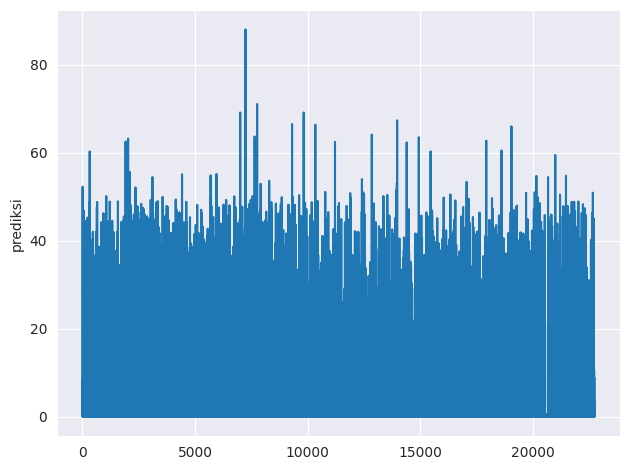

<Figure size 10000x2000 with 0 Axes>

In [268]:
sns.lineplot(final_submission['prediksi'])

plt.tight_layout()
plt.figure(figsize = (100,20))

In [269]:
final_submission.to_csv('submission_final.csv', index = False)

In [270]:
round(final_submission.describe(), 2)

,tahun,bulan,hari,prediksi
count,22748.00,22748.00,22748.00,22748.00
mean,2024.29,5.49,15.72,5.11
std,0.45,3.40,8.79,10.29
min,2024.00,1.00,1.00,0.00
25%,2024.00,3.00,8.00,0.00
50%,2024.00,5.00,16.00,0.13
75%,2025.00,8.00,23.00,4.33
max,2025.00,12.00,31.00,88.05
